Simran Anand

Task1

Aim: We need to present a strategic recommendation to Julia that is supported by data which she can then use for the upcoming category review however to do so we need to analyse the data to understand the current purchasing trends and behaviours. The client is particularly interested in customer segments and their chip purchasing behaviour. Consider what metrics would help describe the customers’ purchasing behaviour.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
pur_bhvr = pd.read_csv("C:/Users/simmu/Downloads/QVI_purchase_behaviour.csv")
print(pur_bhvr.head())

   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004   OLDER SINGLES/COUPLES       Mainstream
4            1005  MIDAGE SINGLES/COUPLES       Mainstream


In [6]:
tran_data = pd.read_excel("C:/Users/simmu/Downloads/QVI_transaction_data.xlsx")
print(tran_data.head())

    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  


In [7]:
merged_data = pd.merge(pur_bhvr, tran_data, on="LYLTY_CARD_NBR", how="right")
print(merged_data.head())

   LYLTY_CARD_NBR              LIFESTAGE PREMIUM_CUSTOMER   DATE  STORE_NBR  \
0            1000  YOUNG SINGLES/COUPLES          Premium  43390          1   
1            1002  YOUNG SINGLES/COUPLES       Mainstream  43359          1   
2            1003         YOUNG FAMILIES           Budget  43531          1   
3            1003         YOUNG FAMILIES           Budget  43532          1   
4            1004  OLDER SINGLES/COUPLES       Mainstream  43406          1   

   TXN_ID  PROD_NBR                               PROD_NAME  PROD_QTY  \
0       1         5  Natural Chip        Compny SeaSalt175g         2   
1       2        58   Red Rock Deli Chikn&Garlic Aioli 150g         1   
2       3        52   Grain Waves Sour    Cream&Chives 210G         1   
3       4       106  Natural ChipCo      Hony Soy Chckn175g         1   
4       5        96          WW Original Stacked Chips 160g         1   

   TOT_SALES  
0        6.0  
1        2.7  
2        3.6  
3        3.0  
4        1.

In [8]:
print(len(merged_data))
print(len(tran_data))

264836
264836


In [9]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264836 non-null  int64  
 1   LIFESTAGE         264836 non-null  object 
 2   PREMIUM_CUSTOMER  264836 non-null  object 
 3   DATE              264836 non-null  int64  
 4   STORE_NBR         264836 non-null  int64  
 5   TXN_ID            264836 non-null  int64  
 6   PROD_NBR          264836 non-null  int64  
 7   PROD_NAME         264836 non-null  object 
 8   PROD_QTY          264836 non-null  int64  
 9   TOT_SALES         264836 non-null  float64
dtypes: float64(1), int64(6), object(3)
memory usage: 22.2+ MB


In [10]:
from datetime import date, timedelta
start = date(1899,12,30)

new_date_format = []

for date in merged_data["DATE"]:
    delta = timedelta(date)
    new_date_format.append(start + delta)

In [11]:
merged_data["DATE"] = pd.to_datetime(pd.Series(new_date_format))
print(merged_data["DATE"].dtype)

datetime64[ns]


In [12]:
merged_data["PROD_NAME"].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'Red Rock Deli Chikn&Garlic Aioli 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Natural ChipCo      Hony Soy Chckn175g',
       'WW Original Stacked Chips 160g', 'Cheetos Puffs 165g',
       'Infuzions SourCream&Herbs Veg Strws 110g',
       'RRD SR Slow Rst     Pork Belly 150g',
       'Doritos Cheese      Supreme 330g', 'Doritos Mexicana    170g',
       'Old El Paso Salsa   Dip Tomato Med 300g',
       'GrnWves Plus Btroot & Chilli Jam 180g',
       'Smiths Crinkle Cut  Chips Barbecue 170g',
       'Kettle Sensations   Camembert & Fig 150g',
       'Doritos Corn Chip Southern Chicken 150g',
       'CCs Tasty Cheese    175g', 'Tostitos Splash Of  Lime 175g',
       'Kettle 135g Swt Pot Sea Salt', 'RRD Salt & Vinegar  165g',
       'Infuzions Mango     Chutny Papadums 70g',
       'Smiths Crinkle Cut  Snag&Sauce 150g',
       'Smiths Crinkle      Original 330g',
       'RRD Sweet Chilli &  Sour Cream 165g',
     

In [13]:
split_prods = merged_data["PROD_NAME"].str.replace(r'([0-9]+[gG])','').str.replace(r'[^\w]', ' ').str.split()

In [14]:
word_counts = {}

def count_words(line):
    for word in line:
        if word not in word_counts:
            word_counts[word] = 1
        else:
            word_counts[word] += 1
            
split_prods.apply(lambda line: count_words(line))
print(pd.Series(word_counts).sort_values(ascending=False))

Chips     49770
Kettle    41288
Smiths    28860
Salt      27976
Cheese    27890
          ...  
Onin       1432
Pc         1431
Garden     1419
NCC        1419
Fries      1418
Length: 198, dtype: int64


In [15]:
merged_data = merged_data[~merged_data["PROD_NAME"].str.contains(r"[Ss]alsa")]

In [16]:
print(merged_data.describe(), '\n')
print(merged_data.info())

       LYLTY_CARD_NBR      STORE_NBR        TXN_ID       PROD_NBR  \
count    2.467420e+05  246742.000000  2.467420e+05  246742.000000   
mean     1.355310e+05     135.051098  1.351311e+05      56.351789   
std      8.071528e+04      76.787096  7.814772e+04      33.695428   
min      1.000000e+03       1.000000  1.000000e+00       1.000000   
25%      7.001500e+04      70.000000  6.756925e+04      26.000000   
50%      1.303670e+05     130.000000  1.351830e+05      53.000000   
75%      2.030840e+05     203.000000  2.026538e+05      87.000000   
max      2.373711e+06     272.000000  2.415841e+06     114.000000   

            PROD_QTY      TOT_SALES  
count  246742.000000  246742.000000  
mean        1.908062       7.321322  
std         0.659831       3.077828  
min         1.000000       1.700000  
25%         2.000000       5.800000  
50%         2.000000       7.400000  
75%         2.000000       8.800000  
max       200.000000     650.000000   

<class 'pandas.core.frame.DataFram

In [17]:
merged_data["PROD_QTY"].value_counts(bins=4).sort_index()

(0.8, 50.75]       246740
(50.75, 100.5]          0
(100.5, 150.25]         0
(150.25, 200.0]         2
Name: PROD_QTY, dtype: int64

In [18]:
merged_data.sort_values(by="PROD_QTY", ascending=False).head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
221625,226000,OLDER FAMILIES,Premium,2018-08-19,226,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
221626,226000,OLDER FAMILIES,Premium,2019-05-20,226,226210,4,Dorito Corn Chp Supreme 380g,200,650.0
218544,223025,YOUNG FAMILIES,Mainstream,2018-08-15,223,223075,8,Smiths Crinkle Cut Chips Original 170g,5,14.5
91147,94098,YOUNG FAMILIES,Budget,2019-05-18,94,93080,114,Kettle Sensations Siracha Lime 150g,5,23.0
87093,90215,RETIREES,Premium,2018-08-19,90,88934,95,Sunbites Whlegrn Crisps Frch/Onin 90g,5,8.5


In [19]:
merged_data = merged_data[merged_data["PROD_QTY"] < 6]

In [20]:
len(merged_data[merged_data["LYLTY_CARD_NBR"] == 226000])

0

In [21]:
merged_data["DATE"].describe()

count                  246740
unique                    364
top       2018-12-24 00:00:00
freq                      865
first     2018-07-01 00:00:00
last      2019-06-30 00:00:00
Name: DATE, dtype: object

In [22]:
pd.date_range(start=merged_data["DATE"].min(), end=merged_data["DATE"].max()).difference(merged_data["DATE"])

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

In [23]:
check_null_date = pd.merge(pd.Series(pd.date_range(start=merged_data["DATE"].min(), end=merged_data["DATE"].max()), name="DATE"), merged_data, on="DATE", how="left")

<ipython-input-24-502b977c9a27>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dec = trans_by_date[(trans_by_date.index >= pd.datetime(2018,12,1)) & (trans_by_date.index < pd.datetime(2019,1,1))].sort_index()


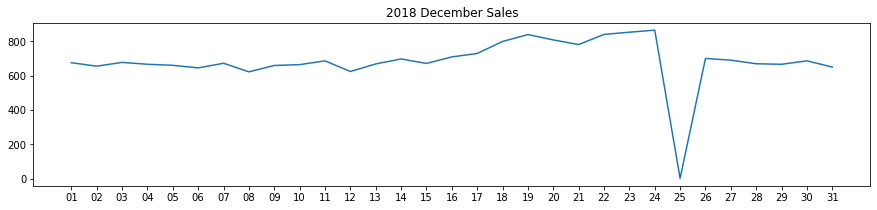

In [24]:
trans_by_date = check_null_date["DATE"].value_counts()
dec = trans_by_date[(trans_by_date.index >= pd.datetime(2018,12,1)) & (trans_by_date.index < pd.datetime(2019,1,1))].sort_index()
dec.index = dec.index.strftime('%d')
ax = dec.plot(figsize=(15,3))
ax.set_xticks(np.arange(len(dec)))
ax.set_xticklabels(dec.index)
plt.title("2018 December Sales")
plt.savefig("2018 December Sales.png", bbox_inches="tight")
plt.show()

In [25]:
check_null_date["DATE"].value_counts().sort_values().head()

2018-12-25      1
2019-06-13    607
2018-09-22    609
2018-11-25    610
2018-10-18    611
Name: DATE, dtype: int64

count    240676.000000
mean        175.302286
std          60.014468
min          70.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: 0, dtype: float64


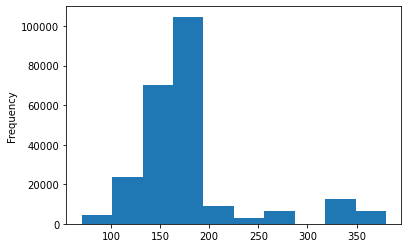

In [26]:
merged_data["PROD_NAME"] = merged_data["PROD_NAME"].str.replace(r'[0-9]+(G)','g')
pack_sizes = merged_data["PROD_NAME"].str.extract(r'([0-9]+[gG])')[0].str.replace("g","").astype("float")
print(pack_sizes.describe())
pack_sizes.plot.hist()

In [28]:
merged_data["PROD_NAME"].str.split().str[0].value_counts().sort_index()

Burger         1564
CCs            4551
Cheetos        2927
Cheezels       4603
Cobs           9693
Dorito         3183
Doritos       22041
French         1418
Grain          6272
GrnWves        1468
Infuzions     11057
Infzns         3144
Kettle        41288
NCC            1419
Natural        6050
Pringles      25102
RRD           11894
Red            4427
Smith          2963
Smiths        27390
Snbts          1576
Sunbites       1432
Thins         14075
Tostitos       9471
Twisties       9454
Tyrrells       6442
WW            10320
Woolworths     1516
Name: PROD_NAME, dtype: int64

In [29]:
merged_data["PROD_NAME"].str.split()[merged_data["PROD_NAME"].str.split().str[0] == "Grain"].value_counts()

[Grain, Waves, Sweet, Chilli, 210g]      3167
[Grain, Waves, Sour, Cream&Chives, g]    3105
Name: PROD_NAME, dtype: int64

In [30]:
merged_data["PROD_NAME"].str.split()[merged_data["PROD_NAME"].str.split().str[0] == "Natural"].value_counts()

[Natural, Chip, Co, Tmato, Hrb&Spce, 175g]       1572
[Natural, ChipCo, Sea, Salt, &, Vinegr, 175g]    1550
[Natural, Chip, Compny, SeaSalt175g]             1468
[Natural, ChipCo, Hony, Soy, Chckn175g]          1460
Name: PROD_NAME, dtype: int64

In [31]:
merged_data["PROD_NAME"].str.split()[merged_data["PROD_NAME"].str.split().str[0] == "Red"].value_counts()

[Red, Rock, Deli, Sp, Salt, &, Truffle, g]      1498
[Red, Rock, Deli, Thai, Chilli&Lime, 150g]      1495
[Red, Rock, Deli, Chikn&Garlic, Aioli, 150g]    1434
Name: PROD_NAME, dtype: int64

In [32]:
merged_data["Cleaned_Brand_Names"] = merged_data["PROD_NAME"].str.split().str[0]

In [33]:
def clean_brand_names(line):
    brand = line["Cleaned_Brand_Names"]
    if brand == "Dorito":
        return "Doritos"
    elif brand == "GrnWves" or brand == "Grain":
        return "Grain Waves"
    elif brand == "Infzns":
        return "Infuzions"
    elif brand == "Natural" or brand == "NCC":
        return "Natural Chip Co"
    elif brand == "Red":
        return "RRD"
    elif brand == "Smith":
        return "Smiths"
    elif brand == "Snbts":
        return "Sunbites"
    elif brand == "WW":
        return "Woolworths"
    else:
        return brand

In [34]:
merged_data["Cleaned_Brand_Names"] = merged_data.apply(lambda line: clean_brand_names(line), axis=1)

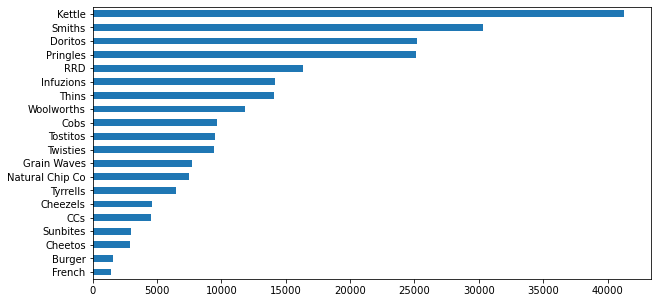

In [35]:
merged_data["Cleaned_Brand_Names"].value_counts(ascending=True).plot.barh(figsize=(10,5))

In [36]:
merged_data.isnull().sum()

LYLTY_CARD_NBR         0
LIFESTAGE              0
PREMIUM_CUSTOMER       0
DATE                   0
STORE_NBR              0
TXN_ID                 0
PROD_NBR               0
PROD_NAME              0
PROD_QTY               0
TOT_SALES              0
Cleaned_Brand_Names    0
dtype: int64

In [37]:
grouped_sales = pd.DataFrame(merged_data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"].agg(["sum", "mean"]))
grouped_sales.sort_values(ascending=False, by="sum")

sum      mean
LIFESTAGE              PREMIUM_CUSTOMER                     
OLDER FAMILIES         Budget            156863.75  7.291241
YOUNG SINGLES/COUPLES  Mainstream        147582.20  7.551279
RETIREES               Mainstream        145168.95  7.269352
YOUNG FAMILIES         Budget            129717.95  7.302705
OLDER SINGLES/COUPLES  Budget            127833.60  7.444305
                       Mainstream        124648.50  7.306049
                       Premium           123537.55  7.459997
RETIREES               Budget            105916.30  7.445786
OLDER FAMILIES         Mainstream         96413.55  7.281440
RETIREES               Premium            91296.65  7.461315
YOUNG FAMILIES         Mainstream         86338.25  7.226772
MIDAGE SINGLES/COUPLES Mainstream         84734.25  7.637156
YOUNG FAMILIES         Premium            78571.70  7.285951
OLDER FAMILIES         Premium            75242.60  7.232779
YOUNG SINGLES/COUPLES  Budget             57122.10  6.663023
MIDAGE SINGLES/COUPLES Premium            54443.85  7.152371
YOUNG SINGLES/COUPLES  Premium            39052.30  6.673325
MIDAGE SINGLES/COUPLES Budget             33345.70  7.108442
NEW FAMILIES           Budget             20607.45  7.297256
                       Mainstream         15979.70  7.313364
                       Premium            10760.80  7.231720

In [38]:
grouped_sales["sum"].sum()

1805177.699999998

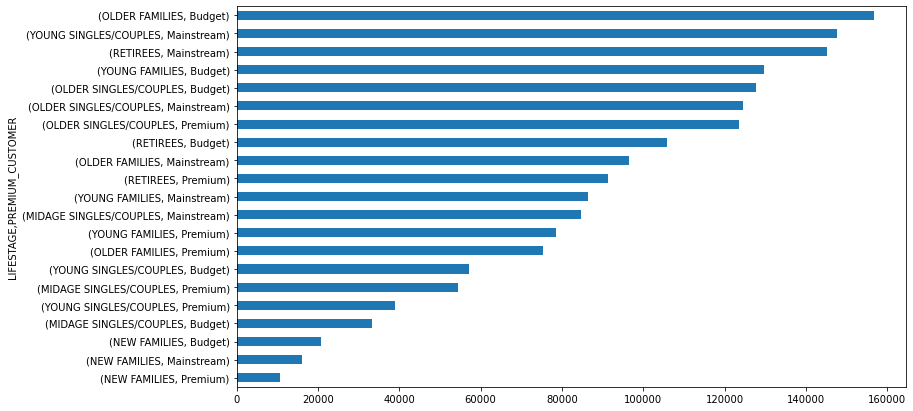

In [39]:
grouped_sales["sum"].sort_values().plot.barh(figsize=(12,7))

In [41]:
stage_agg_prem = merged_data.groupby("LIFESTAGE")["PREMIUM_CUSTOMER"].agg(pd.Series.mode).sort_values()
print("Top contributor per LIFESTAGE by PREMIUM category")
print(stage_agg_prem)

Top contributor per LIFESTAGE by PREMIUM category
LIFESTAGE
NEW FAMILIES                  Budget
OLDER FAMILIES                Budget
OLDER SINGLES/COUPLES         Budget
YOUNG FAMILIES                Budget
MIDAGE SINGLES/COUPLES    Mainstream
RETIREES                  Mainstream
YOUNG SINGLES/COUPLES     Mainstream
Name: PREMIUM_CUSTOMER, dtype: object


In [42]:
unique_cust = merged_data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["LYLTY_CARD_NBR"].nunique().sort_values(ascending=False)
pd.DataFrame(unique_cust)

LYLTY_CARD_NBR
LIFESTAGE              PREMIUM_CUSTOMER                
YOUNG SINGLES/COUPLES  Mainstream                  7917
RETIREES               Mainstream                  6358
OLDER SINGLES/COUPLES  Mainstream                  4858
                       Budget                      4849
                       Premium                     4682
OLDER FAMILIES         Budget                      4611
RETIREES               Budget                      4385
YOUNG FAMILIES         Budget                      3953
RETIREES               Premium                     3812
YOUNG SINGLES/COUPLES  Budget                      3647
MIDAGE SINGLES/COUPLES Mainstream                  3298
OLDER FAMILIES         Mainstream                  2788
YOUNG FAMILIES         Mainstream                  2685
YOUNG SINGLES/COUPLES  Premium                     2480
YOUNG FAMILIES         Premium                     2398
MIDAGE SINGLES/COUPLES Premium                     2369
OLDER FAMILIES         Premium                     2231
MIDAGE SINGLES/COUPLES Budget                      1474
NEW FAMILIES           Budget                      1087
                       Mainstream                   830
                       Premium                      575

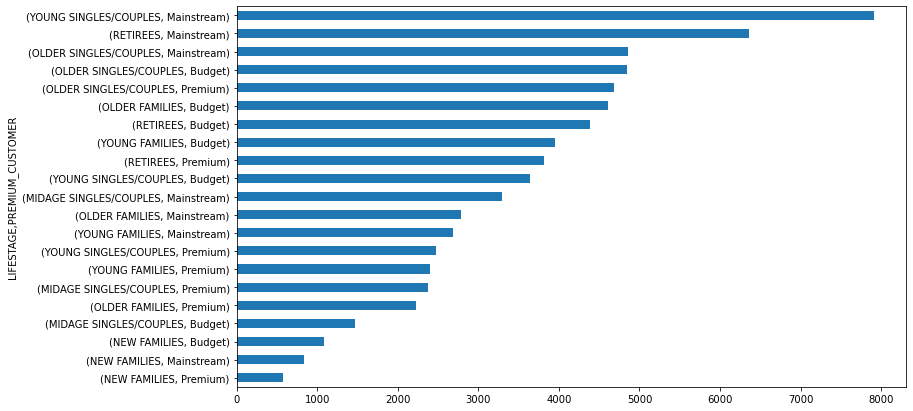

In [43]:
unique_cust.sort_values().plot.barh(figsize=(12,7))

In [45]:
freq_per_cust = merged_data.groupby(["LYLTY_CARD_NBR", "LIFESTAGE", "PREMIUM_CUSTOMER"]).count()["DATE"]
freq_per_cust.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).agg(["mean", "count"]).sort_values(ascending=False, by="mean")

mean  count
LIFESTAGE              PREMIUM_CUSTOMER                 
OLDER FAMILIES         Mainstream        4.749283   2788
                       Budget            4.665799   4611
                       Premium           4.662931   2231
YOUNG FAMILIES         Premium           4.497081   2398
                       Budget            4.493549   3953
                       Mainstream        4.449534   2685
OLDER SINGLES/COUPLES  Budget            3.541349   4849
                       Premium           3.536950   4682
                       Mainstream        3.511939   4858
MIDAGE SINGLES/COUPLES Mainstream        3.364160   3298
RETIREES               Budget            3.244014   4385
MIDAGE SINGLES/COUPLES Premium           3.213170   2369
RETIREES               Premium           3.209864   3812
MIDAGE SINGLES/COUPLES Budget            3.182497   1474
RETIREES               Mainstream        3.140925   6358
NEW FAMILIES           Mainstream        2.632530    830
                       Budget            2.597976   1087
                       Premium           2.587826    575
YOUNG SINGLES/COUPLES  Mainstream        2.468612   7917
                       Premium           2.359677   2480
                       Budget            2.350699   3647

In [46]:
grouped_sales.sort_values(ascending=False, by="mean")

,,sum,mean
LIFESTAGE,PREMIUM_CUSTOMER,,
MIDAGE SINGLES/COUPLES,Mainstream,84734.25,7.637156
YOUNG SINGLES/COUPLES,Mainstream,147582.20,7.551279
RETIREES,Premium,91296.65,7.461315
OLDER SINGLES/COUPLES,Premium,123537.55,7.459997
RETIREES,Budget,105916.30,7.445786
OLDER SINGLES/COUPLES,Budget,127833.60,7.444305
NEW FAMILIES,Mainstream,15979.70,7.313364
OLDER SINGLES/COUPLES,Mainstream,124648.50,7.306049
YOUNG FAMILIES,Budget,129717.95,7.302705


In [47]:
from scipy.stats import ttest_ind

In [48]:
mainstream = merged_data["PREMIUM_CUSTOMER"] == "Mainstream"
young_midage = (merged_data["LIFESTAGE"] == "MIDAGE SINGLES/COUPLES") | (merged_data["LIFESTAGE"] == "YOUNG SINGLES/COUPLES")

budget_premium = (merged_data["PREMIUM_CUSTOMER"] == "Budget") | (merged_data["PREMIUM_CUSTOMER"] == "Premium")

a = merged_data[young_midage & mainstream]["TOT_SALES"]
b = merged_data[young_midage & budget_premium]["TOT_SALES"]
stat, pval = ttest_ind(a.values, b.values, equal_var=False)

print(pval)
pval < 0.0000001

1.8346459081778177e-237


True

In [49]:
merged_data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["Cleaned_Brand_Names"].agg(pd.Series.mode).sort_values()

LIFESTAGE               PREMIUM_CUSTOMER
MIDAGE SINGLES/COUPLES  Budget              Kettle
YOUNG SINGLES/COUPLES   Budget              Kettle
YOUNG FAMILIES          Premium             Kettle
                        Mainstream          Kettle
                        Budget              Kettle
RETIREES                Premium             Kettle
                        Mainstream          Kettle
                        Budget              Kettle
OLDER SINGLES/COUPLES   Premium             Kettle
YOUNG SINGLES/COUPLES   Mainstream          Kettle
OLDER SINGLES/COUPLES   Mainstream          Kettle
OLDER FAMILIES          Premium             Kettle
                        Mainstream          Kettle
                        Budget              Kettle
NEW FAMILIES            Premium             Kettle
                        Mainstream          Kettle
                        Budget              Kettle
MIDAGE SINGLES/COUPLES  Premium             Kettle
                        Mainstream       

========== YOUNG SINGLES/COUPLES - Premium ==========
Kettle      838
Smiths      787
Pringles    537
Name: Cleaned_Brand_Names, dtype: int64


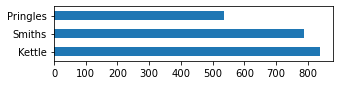

========== YOUNG SINGLES/COUPLES - Mainstream ==========
Kettle      3844
Doritos     2379
Pringles    2315
Name: Cleaned_Brand_Names, dtype: int64


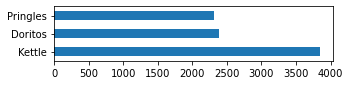

========== YOUNG SINGLES/COUPLES - Budget ==========
Kettle      1211
Smiths      1185
Pringles     832
Name: Cleaned_Brand_Names, dtype: int64


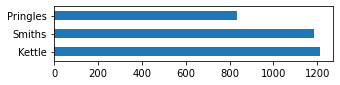

========== YOUNG FAMILIES - Premium ==========
Kettle      1745
Smiths      1384
Pringles    1007
Name: Cleaned_Brand_Names, dtype: int64


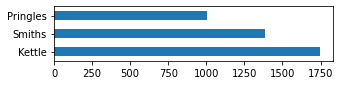

========== YOUNG FAMILIES - Mainstream ==========
Kettle      1789
Smiths      1681
Pringles    1148
Name: Cleaned_Brand_Names, dtype: int64


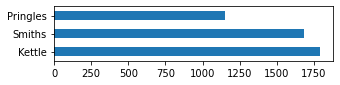

========== YOUNG FAMILIES - Budget ==========
Kettle     2743
Smiths     2334
Doritos    1767
Name: Cleaned_Brand_Names, dtype: int64


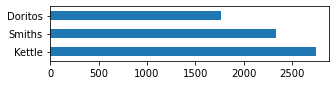

========== OLDER SINGLES/COUPLES - Premium ==========
Kettle     2947
Smiths     1952
Doritos    1784
Name: Cleaned_Brand_Names, dtype: int64


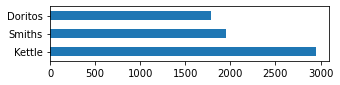

========== OLDER SINGLES/COUPLES - Mainstream ==========
Kettle     2835
Smiths     2070
Doritos    1791
Name: Cleaned_Brand_Names, dtype: int64


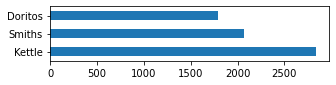

========== OLDER SINGLES/COUPLES - Budget ==========
Kettle      3065
Smiths      2010
Pringles    1843
Name: Cleaned_Brand_Names, dtype: int64


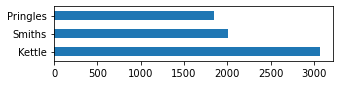

========== MIDAGE SINGLES/COUPLES - Premium ==========
Kettle      1206
Smiths       923
Pringles     781
Name: Cleaned_Brand_Names, dtype: int64


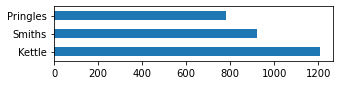

========== MIDAGE SINGLES/COUPLES - Mainstream ==========
Kettle     2136
Smiths     1276
Doritos    1210
Name: Cleaned_Brand_Names, dtype: int64


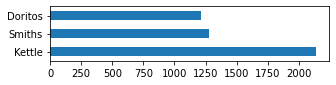

========== MIDAGE SINGLES/COUPLES - Budget ==========
Kettle     713
Smiths     591
Doritos    479
Name: Cleaned_Brand_Names, dtype: int64


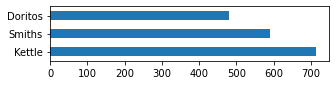

========== NEW FAMILIES - Premium ==========
Kettle      247
Pringles    165
Smiths      155
Name: Cleaned_Brand_Names, dtype: int64


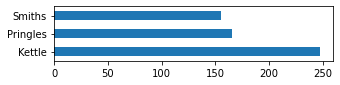

========== NEW FAMILIES - Mainstream ==========
Kettle     414
Doritos    257
Smiths     244
Name: Cleaned_Brand_Names, dtype: int64


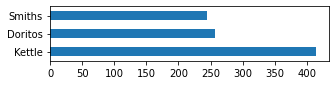

========== NEW FAMILIES - Budget ==========
Kettle     510
Smiths     328
Doritos    315
Name: Cleaned_Brand_Names, dtype: int64


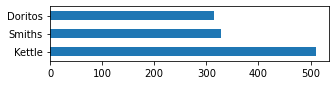

========== OLDER FAMILIES - Premium ==========
Kettle      1512
Smiths      1448
Pringles    1014
Name: Cleaned_Brand_Names, dtype: int64


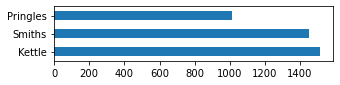

========== OLDER FAMILIES - Mainstream ==========
Kettle     2019
Smiths     1742
Doritos    1263
Name: Cleaned_Brand_Names, dtype: int64


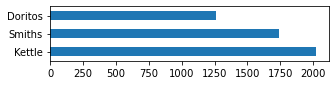

========== OLDER FAMILIES - Budget ==========
Kettle     3320
Smiths     2948
Doritos    2032
Name: Cleaned_Brand_Names, dtype: int64


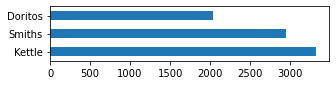

========== RETIREES - Premium ==========
Kettle      2216
Smiths      1395
Pringles    1331
Name: Cleaned_Brand_Names, dtype: int64


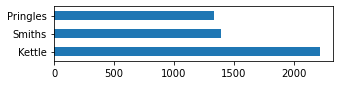

========== RETIREES - Mainstream ==========
Kettle      3386
Smiths      2367
Pringles    2103
Name: Cleaned_Brand_Names, dtype: int64


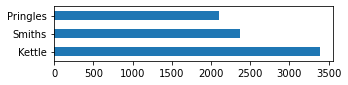

========== RETIREES - Budget ==========
Kettle     2592
Smiths     1612
Doritos    1592
Name: Cleaned_Brand_Names, dtype: int64


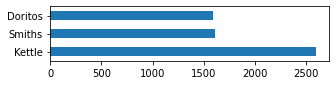

In [50]:
for stage in merged_data["LIFESTAGE"].unique():
    for prem in merged_data["PREMIUM_CUSTOMER"].unique():
        print('==========',stage, '-', prem,'==========')
        summary = merged_data[(merged_data["LIFESTAGE"] == stage) & (merged_data["PREMIUM_CUSTOMER"] == prem)]["Cleaned_Brand_Names"].value_counts().head(3)
        print(summary)
        plt.figure()
        summary.plot.barh(figsize=(5,1))
        plt.show()

In [52]:
!pip install mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [53]:
temp = merged_data.reset_index().rename(columns = {"index": "transaction"})
temp["Segment"] = temp["LIFESTAGE"] + ' - ' + temp['PREMIUM_CUSTOMER']
segment_brand_encode = pd.concat([pd.get_dummies(temp["Segment"]), pd.get_dummies(temp["Cleaned_Brand_Names"])], axis=1)

In [54]:
frequent_sets = apriori(segment_brand_encode, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_sets, metric="lift", min_threshold=1)

In [55]:
set_temp = temp["Segment"].unique()
rules[rules["antecedents"].apply(lambda x: list(x)).apply(lambda x: x in set_temp)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(OLDER FAMILIES - Budget),(Smiths),0.087193,0.123016,0.011948,0.137027,1.113895,0.001222,1.016236
2,(OLDER SINGLES/COUPLES - Budget),(Kettle),0.069596,0.167334,0.012422,0.178488,1.066658,0.000776,1.013578
4,(OLDER SINGLES/COUPLES - Premium),(Kettle),0.067115,0.167334,0.011944,0.177959,1.063495,0.000713,1.012925
6,(RETIREES - Budget),(Kettle),0.057652,0.167334,0.010505,0.182214,1.088926,0.000858,1.018196
9,(RETIREES - Mainstream),(Kettle),0.080935,0.167334,0.013723,0.169554,1.013269,0.000180,1.002674
10,(YOUNG SINGLES/COUPLES - Mainstream),(Kettle),0.079209,0.167334,0.015579,0.196684,1.175400,0.002325,1.036537


========== YOUNG SINGLES/COUPLES - Premium ==========
134.0     537
150.0     896
175.0    1587
Name: Pack_Size, dtype: int64


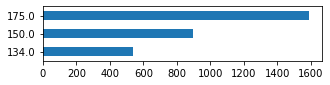

========== YOUNG SINGLES/COUPLES - Mainstream ==========
134.0    2315
150.0    2998
175.0    4928
Name: Pack_Size, dtype: int64


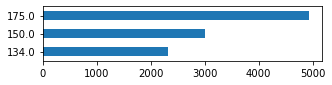

========== YOUNG SINGLES/COUPLES - Budget ==========
134.0     832
150.0    1325
175.0    2262
Name: Pack_Size, dtype: int64


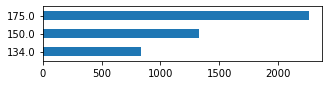

========== YOUNG FAMILIES - Premium ==========
134.0    1007
150.0    1697
175.0    2926
Name: Pack_Size, dtype: int64


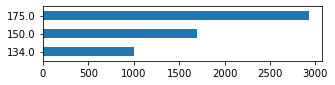

========== YOUNG FAMILIES - Mainstream ==========
134.0    1148
150.0    1927
175.0    3087
Name: Pack_Size, dtype: int64


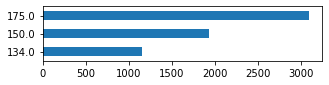

========== YOUNG FAMILIES - Budget ==========
134.0    1674
150.0    2749
175.0    4800
Name: Pack_Size, dtype: int64


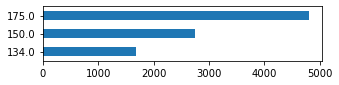

========== OLDER SINGLES/COUPLES - Premium ==========
134.0    1744
150.0    2672
175.0    4382
Name: Pack_Size, dtype: int64


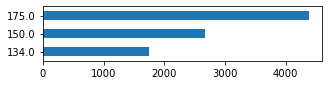

========== OLDER SINGLES/COUPLES - Mainstream ==========
134.0    1720
150.0    2660
175.0    4422
Name: Pack_Size, dtype: int64


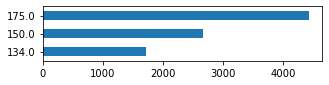

========== OLDER SINGLES/COUPLES - Budget ==========
134.0    1843
150.0    2726
175.0    4535
Name: Pack_Size, dtype: int64


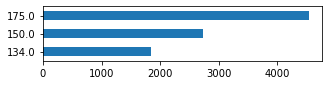

========== MIDAGE SINGLES/COUPLES - Premium ==========
134.0     781
150.0    1163
175.0    2034
Name: Pack_Size, dtype: int64


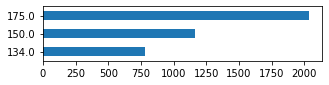

========== MIDAGE SINGLES/COUPLES - Mainstream ==========
134.0    1159
150.0    1714
175.0    2912
Name: Pack_Size, dtype: int64


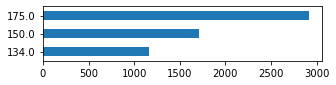

========== MIDAGE SINGLES/COUPLES - Budget ==========
134.0     449
150.0     746
175.0    1256
Name: Pack_Size, dtype: int64


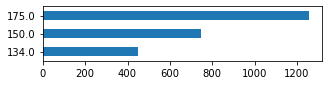

========== NEW FAMILIES - Premium ==========
134.0    165
150.0    225
175.0    371
Name: Pack_Size, dtype: int64


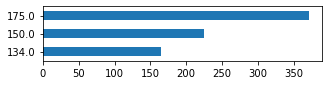

========== NEW FAMILIES - Mainstream ==========
134.0    224
150.0    362
175.0    579
Name: Pack_Size, dtype: int64


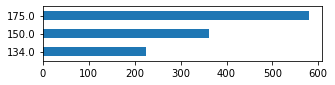

========== NEW FAMILIES - Budget ==========
134.0    309
150.0    425
175.0    763
Name: Pack_Size, dtype: int64


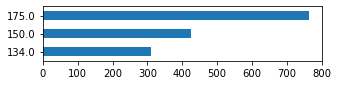

========== OLDER FAMILIES - Premium ==========
134.0    1014
150.0    1607
175.0    2747
Name: Pack_Size, dtype: int64


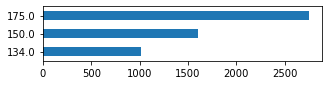

========== OLDER FAMILIES - Mainstream ==========
134.0    1234
150.0    2091
175.0    3489
Name: Pack_Size, dtype: int64


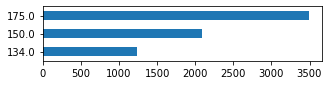

========== OLDER FAMILIES - Budget ==========
134.0    1996
150.0    3414
175.0    5662
Name: Pack_Size, dtype: int64


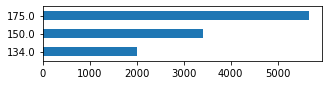

========== RETIREES - Premium ==========
134.0    1331
150.0    1883
175.0    3232
Name: Pack_Size, dtype: int64


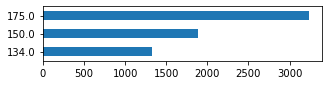

========== RETIREES - Mainstream ==========
134.0    2103
150.0    3183
175.0    5187
Name: Pack_Size, dtype: int64


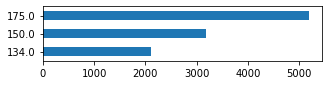

========== RETIREES - Budget ==========
134.0    1517
150.0    2242
175.0    3768
Name: Pack_Size, dtype: int64


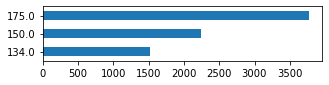

In [56]:
merged_pack = pd.concat([merged_data, pack_sizes.rename("Pack_Size")], axis=1)

for stage in merged_data["LIFESTAGE"].unique():
    for prem in merged_data["PREMIUM_CUSTOMER"].unique():
        print('==========',stage, '-', prem,'==========')
        summary = merged_pack[(merged_pack["LIFESTAGE"] == stage) & (merged_pack["PREMIUM_CUSTOMER"] == prem)]["Pack_Size"].value_counts().head(3).sort_index()
        print(summary)
        plt.figure()
        summary.plot.barh(figsize=(5,1))
        plt.show()

In [57]:
(temp.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["PROD_QTY"].sum() / temp.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["LYLTY_CARD_NBR"].nunique()).sort_values(ascending=False)

LIFESTAGE               PREMIUM_CUSTOMER
OLDER FAMILIES          Mainstream          9.255380
                        Budget              9.076773
                        Premium             9.071717
YOUNG FAMILIES          Budget              8.722995
                        Premium             8.716013
                        Mainstream          8.638361
OLDER SINGLES/COUPLES   Budget              6.781398
                        Premium             6.769543
                        Mainstream          6.712021
MIDAGE SINGLES/COUPLES  Mainstream          6.432080
RETIREES                Budget              6.141847
                        Premium             6.103358
MIDAGE SINGLES/COUPLES  Premium             6.078514
                        Budget              6.026459
RETIREES                Mainstream          5.925920
NEW FAMILIES            Mainstream          4.891566
                        Budget              4.821527
                        Premium             4.815652
YOUNG

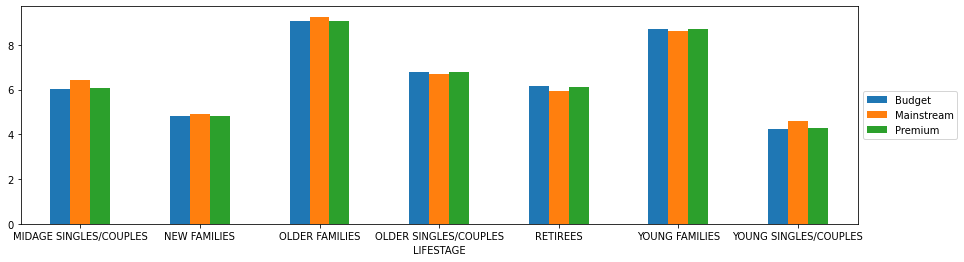

In [58]:
(temp.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["PROD_QTY"].sum() / temp.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["LYLTY_CARD_NBR"].nunique()).unstack().plot.bar(figsize=(15,4), rot=0)
plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.savefig("Average purchase quantity per segment.png", bbox_inches="tight")

In [60]:
#Average chips price per transaction by segments
temp["Unit_Price"] = temp["TOT_SALES"] / temp["PROD_QTY"]
temp.groupby(["Segment"]).mean()["Unit_Price"].sort_values(ascending=False)

Segment
YOUNG SINGLES/COUPLES - Mainstream     4.065642
MIDAGE SINGLES/COUPLES - Mainstream    3.994241
RETIREES - Budget                      3.924404
RETIREES - Premium                     3.920942
NEW FAMILIES - Budget                  3.917688
NEW FAMILIES - Mainstream              3.916133
OLDER SINGLES/COUPLES - Premium        3.893182
OLDER SINGLES/COUPLES - Budget         3.882096
NEW FAMILIES - Premium                 3.872110
RETIREES - Mainstream                  3.844294
OLDER SINGLES/COUPLES - Mainstream     3.814665
MIDAGE SINGLES/COUPLES - Premium       3.770698
YOUNG FAMILIES - Premium               3.762150
YOUNG FAMILIES - Budget                3.760737
OLDER FAMILIES - Budget                3.745340
MIDAGE SINGLES/COUPLES - Budget        3.743328
OLDER FAMILIES - Mainstream            3.737077
YOUNG FAMILIES - Mainstream            3.724533
OLDER FAMILIES - Premium               3.717000
YOUNG SINGLES/COUPLES - Premium        3.665414
YOUNG SINGLES/COUPLES - Budget  

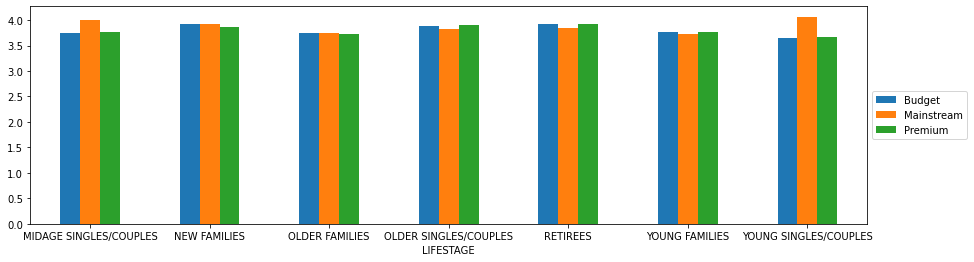

In [61]:
temp.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).mean()["Unit_Price"].unstack().plot.bar(figsize=(15,4), rot=0)
plt.legend(loc="center left", bbox_to_anchor=(1,0.5))

Insights:

Top 3 total sales contributor segment are

Older families (Budget) \$156,864
Young Singles/Couples (Mainstream) \$147,582
Retirees (Mainstream) \$145,169
Young Singles/Couples (Mainstream) has the highest population, followed by Retirees (Mainstream). Which explains their high total sales.

Despite Older Families not having the highest population, they have the highest frequency of purchase, which contributes to their high total sales.
Older Families followed by Young Families has the highest average quantity of chips bought per purchase.
The Mainstream category of the "Young and Midage Singles/Couples" have the highest spending of chips per purchase. And the difference to the non-Mainstream "Young and Midage Singles/Couples" are statistically significant.
Chips brand Kettle is dominating every segment as the most purchased brand.
Observing the 2nd most purchased brand, "Young and Midage Singles/Couples" is the only segment with a different preference (Doritos) as compared to others' (Smiths).
Most frequent chip size purchased is 175gr followed by the 150gr chip size for all segments.

In [62]:
z = temp.groupby(["Segment", "Cleaned_Brand_Names"]).sum()["TOT_SALES"].sort_values(ascending=False).reset_index()
z[z["Segment"] == "YOUNG SINGLES/COUPLES - Mainstream"]

,Segment,Cleaned_Brand_Names,TOT_SALES
0,YOUNG SINGLES/COUPLES - Mainstream,Kettle,35423.6
8,YOUNG SINGLES/COUPLES - Mainstream,Doritos,20925.9
22,YOUNG SINGLES/COUPLES - Mainstream,Pringles,16006.2
24,YOUNG SINGLES/COUPLES - Mainstream,Smiths,14958.9
54,YOUNG SINGLES/COUPLES - Mainstream,Infuzions,8749.4
61,YOUNG SINGLES/COUPLES - Mainstream,Twisties,7539.8
69,YOUNG SINGLES/COUPLES - Mainstream,Tostitos,7238.0
70,YOUNG SINGLES/COUPLES - Mainstream,Thins,7217.1
84,YOUNG SINGLES/COUPLES - Mainstream,Cobs,6144.6
115,YOUNG SINGLES/COUPLES - Mainstream,Tyrrells,4800.6
